In this lab, we will use data from a Nature paper to implement PCA and Kmeans clustering \
The data *InputDataMigliavacca2021.csv* is on Carmen \
Here is the link of the paper: \
https://www.nature.com/articles/s41586-021-03939-9 

Excercise 1: PCA \
The input data includes some plant triats. We are interested in 12 variables. We will use PCA (principle component analysis) to reduce the data dimension, project these variables to the first two principle components (PC1 and PC2), and reproduce the figures in the Nature paper.
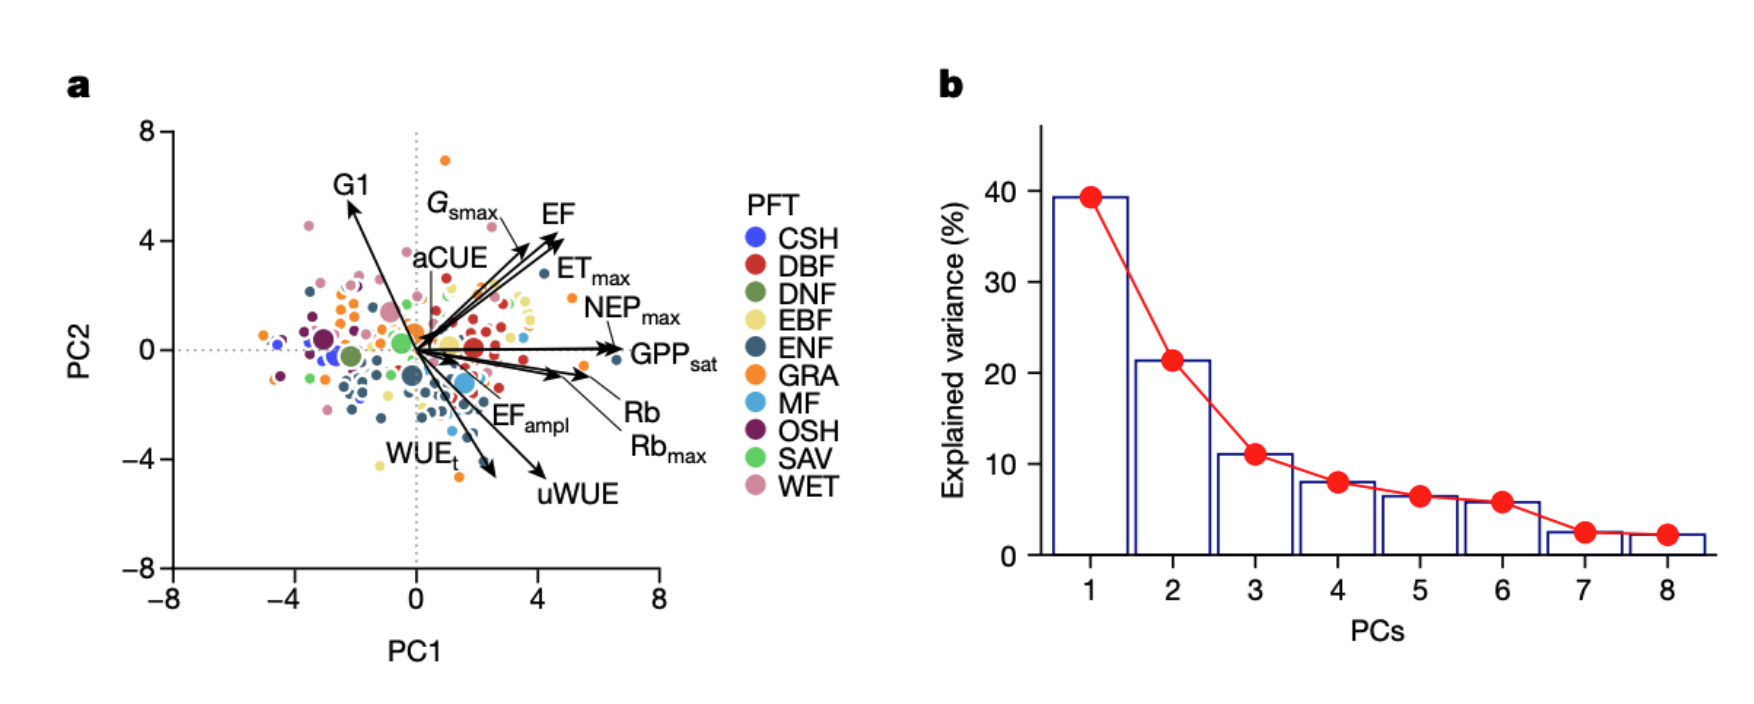

In [1]:
# load the packages and read the csv into a dataframe df

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks',font_scale=1.75)
from sklearn.linear_model import LinearRegression

# Correct file path for Windows
fname = r'C:\Users\dbryant\Data\InputDataMigliavacca2021.csv'  # Use raw string for file path
if os.path.exists(fname):
    df = pd.read_csv(fname)
    print("File loaded successfully:")
    print(df.head())
else:
    print(f"File not found: {fname}")

File loaded successfully:
  SITE_ID  PFT KoeppenGeiger  latitude  longitude   dataset  TZ  nyears  \
0  AR-Vir  ENF           Cfa  -28.2395   -56.1886  Berkeley  -4       4   
1  AT-Neu  GRA           Dfc   47.1167    11.3175  Berkeley   1      11   
2  AU-Ade  SAV            Aw  -13.0769   131.1178  Berkeley   8       3   
3  AU-ASM  ENF           BSh  -22.2830   133.2490  Berkeley   8       5   
4  AU-Cpr  SAV           BSk  -34.0021   140.5891  Berkeley   8       5   

        WUE      uWUE  ...      WUEt     Nmass  LAImax        SWin       Tair  \
0  3.756653  4.336426  ...       NaN       NaN     NaN  226.631078  23.455699   
1  4.150454  4.563017  ...  0.250152  2.906181   6.500  136.208461   6.763112   
2  1.691328  2.419987  ...       NaN       NaN   2.040  235.046924  27.426997   
3  1.600938  2.552875  ...  0.081484  1.776368   0.470  265.270436  22.792080   
4  2.123031  2.719756  ...  0.126235  1.242741   0.782  219.199492  17.868690   

         VPD           P      CSWI  

In [4]:
# step 0: Extract the variables we need

# WUE is water use efficiency (carbon gain/water loss)
# WUEt is a variant of WUE
# uWUE is underlying WUE, another variant of WUE
# Rbmax is maximum basal ecosystem respiration
# Rb is mean basal ecosystem respiration
# NEPmax is maximum net ecosystem productivity
# GSmax is maximum dry canopy surface conductance
# GPPsat is maximum gross CO2 uptake at light saturation
# G1 is stomatal slope, normalized WUE
# ETmax is maximum evapotranspiration
# EFampl is evaporative fraction (EF)amplitude
# EF is the ratio between latent heat flux and available energy
# aCUE is apparent carbon-use efficiency 

varlist = ['WUEt','uWUE','Rbmax','Rb','NEPmax','GSmax','GPPsat','G1',
           'ETmax','EFampl','EF','aCUE'] # From Migliavacca et al., 2021 

In [5]:
# step 0: Check if there are nan (not a number) items in the variables
print(df.isna().sum())

SITE_ID            0
PFT                0
KoeppenGeiger      0
latitude           0
longitude          0
dataset            0
TZ                 0
nyears             0
WUE                0
uWUE               0
ETmax              0
GSmax              0
G1                 0
EF                 0
EFampl             0
GPPsat             0
NEPmax             0
Rb                 0
Rbmax              0
aCUE               0
WUEt              17
Nmass            101
LAImax            49
SWin               0
Tair               0
VPD                0
P                  0
CSWI              19
Hc                 3
AGB               11
dtype: int64


In [6]:
# step 0: Remove rows with nan values
print(type(df))
X0 = df[varlist].dropna().values
print(type(X0))
print(X0.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(185, 12)


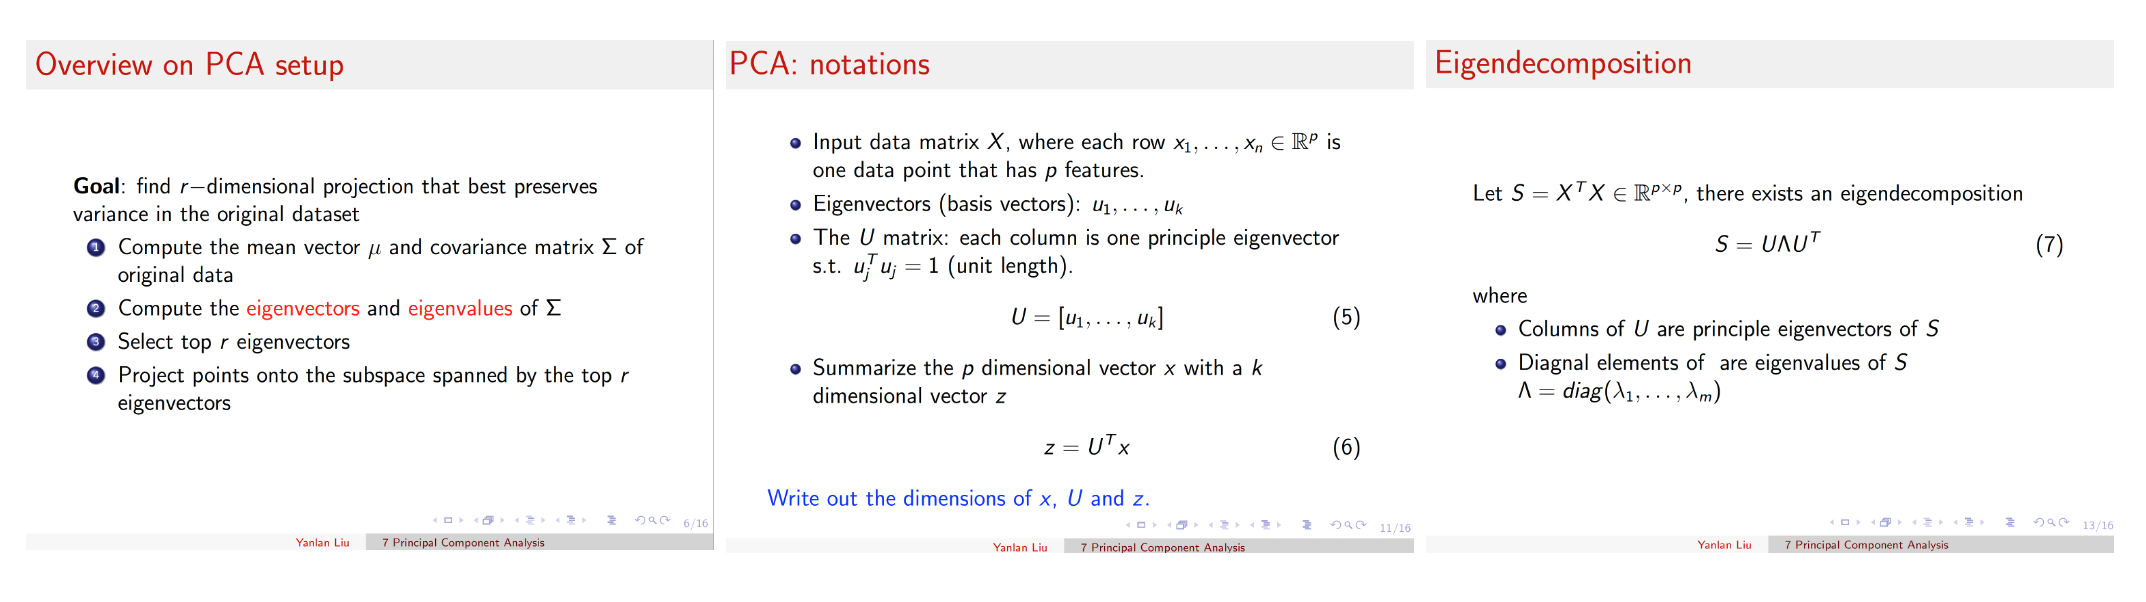

In [8]:
# step 1: Prepare the X matrix for PCA
# n is the number of rows of X0 (the number of data points)
# p is the number of columns of X0 (the number of variables)
n = X0.shape[0]
p = X0.shape[1]
print(n,p)

# Normalize the columns by subtracting the mean of each column (m0)
# and divided by the standard deviation of each column (std0)
m0 = np.mean(X0,axis=0)
std0 = np.std(X0,axis=0)
X = (X0-m0)/std0

# After normalization, check if the mean of each column is 0 
# and if the standard deviation of each column is 1
print(np.mean(X,axis=0))
print(np.std(X,axis=0))

185 12
[ 1.05621217e-16  3.36067510e-17 -2.16043399e-17 -8.40168775e-18
  2.68854008e-16 -1.05621217e-16  1.58431826e-16 -3.36067510e-17
  2.16043399e-16  1.15223146e-16  3.36067510e-16  1.44028933e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


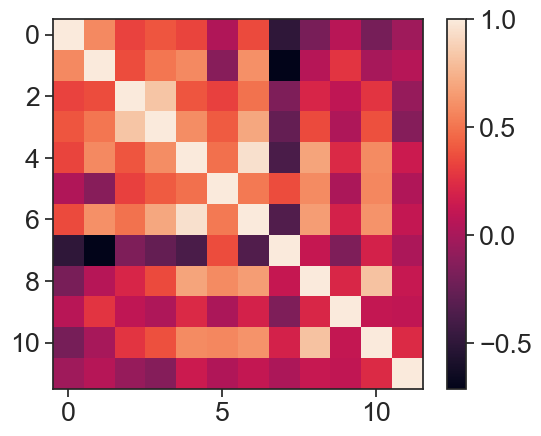

In [9]:
# step 2: Calculate the S matrix, you may want to use np.transpose()
S = np.dot(np.transpose(X),X)/n # covariance matrix

# visualize S
plt.imshow(S); plt.colorbar()

In [10]:
# step 3: eigen decomposition of S, you may want to use np.linalg.eig()

# w stores the eigenvalues, they represent the total amount of variance 
# that can be explained by a given principal component
# v stores the normalized eigenvectors
# The column v[:,i] is the eigenvector corresponding to the eigenvalue w[i]

w, v = np.linalg.eig(S)
print(w) # eigen values, not in strict descending order, need sorting
print(v) # eigen vectors

# What are the dimensions of w and v, does it make sense?
print('-------------------------------------------------------------')
print(w.shape) 
print(v.shape) 

[4.74486811 2.64807243 1.38724683 0.89398526 0.79242325 0.6443374
 0.25175991 0.23983175 0.03362729 0.15798919 0.11731779 0.08854078]
[[ 0.18249312  0.40901955 -0.12025988 -0.19618947  0.15277748  0.61140164
   0.56485884 -0.0628646  -0.01935456  0.14136382  0.07559005  0.01428133]
 [ 0.28032246  0.4107556   0.17410423 -0.00888267 -0.06792725 -0.08002835
  -0.28753478 -0.5799291   0.11073769 -0.21346969  0.14583796  0.46172985]
 [ 0.29815091  0.08651312 -0.41074367  0.05315531  0.48529941 -0.37949581
   0.06192763  0.14364081 -0.03231067  0.1993903  -0.4054815   0.35052766]
 [ 0.37132756  0.09189336 -0.38202482  0.00310921  0.14728611 -0.24352099
  -0.09291686 -0.04285925  0.13221143 -0.04956408  0.56356112 -0.52793475]
 [ 0.42287848 -0.0103076   0.16345648 -0.05059564 -0.23447009  0.12756242
  -0.15297885  0.02307681  0.59680834  0.23013359 -0.45635313 -0.28143614]
 [ 0.25518119 -0.35789016 -0.22682801 -0.04389187  0.11222656  0.52839599
  -0.40695314  0.31199303  0.04909387 -0.288983

In [11]:
# step 4: Sort the eigen values and corresponding eigen vectors in descending order

# first, get the index of w in descending order, you may want to use np.argsort()
idx_asd = np.argsort(w)
# print(idx_asd,w[idx_asd])

# then, reverse idx_asd to get the index in descending order
# you may want to use use np.flip() 
idx_dsd = np.argsort(w)[::-1]
# print(idx_dsd,w[idx_dsd])

# sort w, v in descending order
w_sorted = w[idx_dsd]
v_sorted = v[:,idx_dsd]

print(w_sorted)

[4.74486811 2.64807243 1.38724683 0.89398526 0.79242325 0.6443374
 0.25175991 0.23983175 0.15798919 0.11731779 0.08854078 0.03362729]


Text(0, 0.5, 'Explained variance (%)')

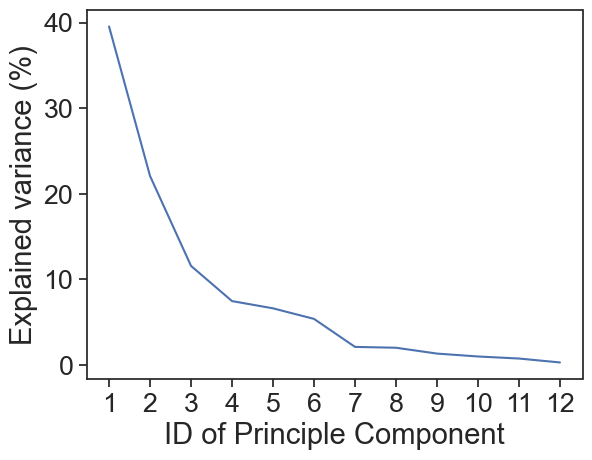

In [12]:
# step 5:Calculate the percentage of variance explained by each principal component

w_sorted_pct = w_sorted/np.sum(w_sorted)*100

# step 6:Visualize the eigenvalues

# generate the red line with dot panel (b) of the above figure
plt.figure() # Fig. 1b in Migliavacca et al., 2021 
# plt.plot(w_sorted_pct)
plt.plot(np.arange(1,p+1),w_sorted_pct)
# set the current tick locations as from 1 to 12
plt.xticks(np.arange(1,p+1))
plt.xlabel('ID of Principle Component')
plt.ylabel('Explained variance (%)')

Text(0, 0.5, 'Cummulative explained variance (%)')

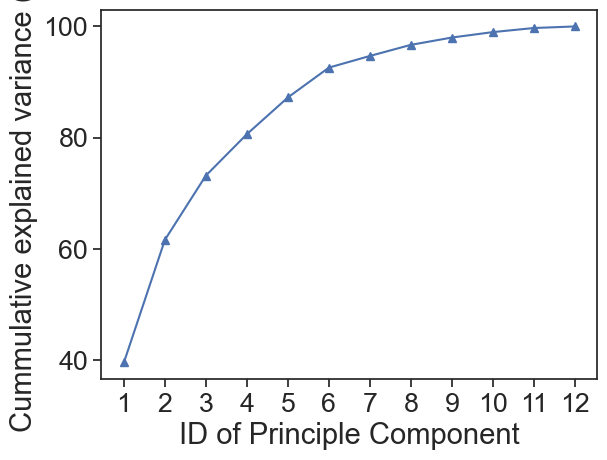

In [13]:
# step 6: Calculate cumulative variance explained if using the first m PCs

# you may want to use np.cumsum()
# np.cumsum() return the cumulative sum of the elements along a given axis
# for example, a = np.array([1, 2, 3]), np.cumsum(a) will be array([1,  3,  6])

var_explained = np.cumsum(w_sorted)/np.sum(w_sorted)*100
plt.figure()
plt.plot(np.arange(1,p+1),var_explained,'^-')
# set the current tick locations as from 1 to 12
plt.xticks(np.arange(1,p+1))
plt.xlabel('ID of Principle Component')
plt.ylabel('Cummulative explained variance (%)')

Text(0, 0.5, 'PC4')

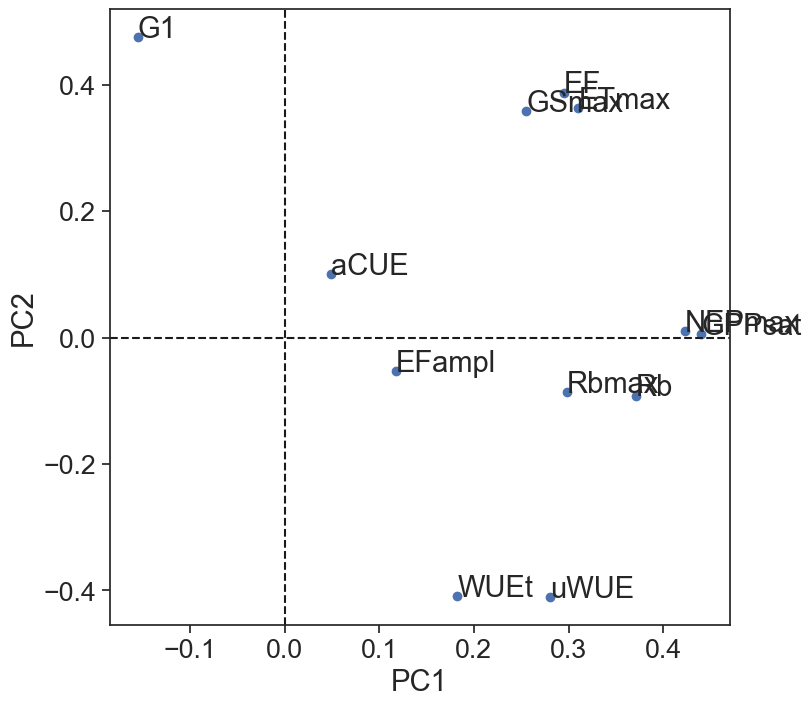

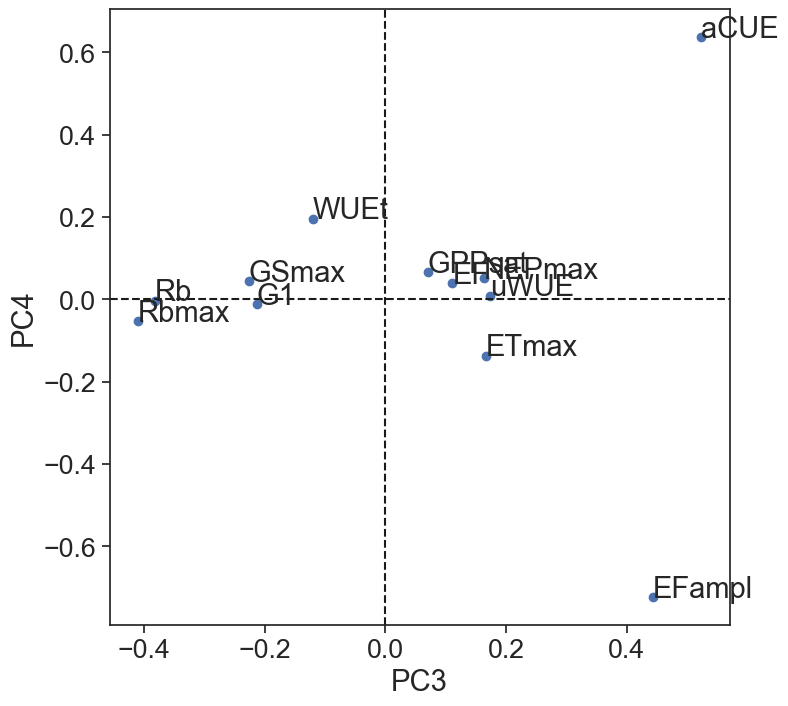

In [14]:
# step 7: project the 12 variables to the first two principle components (PC1 and PC2)

plt.figure(figsize=(8,8))
plt.scatter(v_sorted[:,0],-v_sorted[:,1])
for i,vname in enumerate(varlist):
    plt.text(v_sorted[i,0],-v_sorted[i,1],vname)
plt.axhline(0,linestyle='--',color='k')
plt.axvline(0,linestyle='--',color='k')
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.figure(figsize=(8,8))
plt.scatter(v_sorted[:,2],-v_sorted[:,3])
for i,vname in enumerate(varlist):
    plt.text(v_sorted[i,2],-v_sorted[i,3],vname)
plt.axhline(0,linestyle='--',color='k')
plt.axvline(0,linestyle='--',color='k')
plt.xlabel('PC3')
plt.ylabel('PC4')


In [30]:
# step 8: Wrap the above codes as a function
# the input is the original matrix X
# the outputs are sorted eigen values and eigen vectors

def f_pca(X0): # X0 is the original array
    X = (X0-np.mean(X0,axis=0))/np.std(X0,axis=0)
    S = np.dot(np.transpose(X),X)
    w,v = np.linalg.eig(S)
    idx = np.argsort(w)[::-1]
    w_sorted = w[idx]
    v_sorted = v[:,idx]
    return w_sorted,v_sorted

# call the function to get sorted eigen values and eigen vectors
w_sorted,v_sorted = f_pca(X0)